# Анализ бизнес-показателей приложения

**Продукт:** Развлекательное приложение Procrastinate Pro+

**Проблема:** Последние несколько месяцев компания терпит убытки, несмотря на большие маркетинговые вложения.

**Цель исследования:** Определить основные причины, из-за которых компания терпит убытки, и дать рекомендации по улучшениям в продукте и корректировке маркетингового продвижения.

Исходные данные о пользователях, привлечённых **с 1 мая по 27 октября 2019 года**:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Вопросы для изучения во время исследования:**
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**

Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

## Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# загружаем библиотеки, которые понадобятся для анализа
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

### Структура данных

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# приведем все заголовки к единому стилю
visits = visits.rename(columns={
    'User Id': 'user_id',
    'Region': 'region',
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'})

visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

**Структура `visits_info_short.csv`:**
- `user_id` — уникальный идентификатор пользователя,
- `region` — страна пользователя,
- `device` — тип устройства пользователя,
- `channel` — идентификатор источника перехода,
- `session_start` — дата и время начала сессии,
- `session_end` — дата и время окончания сессии.

In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
# приведем все заголовки к единому стилю
orders = orders.rename(columns={
    'User Id': 'user_id',
    'Event Dt': 'event_dt',
    'Revenue': 'revenue'})

orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

**Структура `orders_info_short.csv`:**
- `user_id` — уникальный идентификатор пользователя,
- `event_dt` — дата и время покупки,
- `revenue` — сумма заказа.

In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
# приведем все заголовки к единому стилю
costs = costs.rename(columns={'Channel': 'channel'})

costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

**Структура `costs_info_short.csv`:**
- `dt` — дата проведения рекламной кампании,
- `channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

### Тип данных

In [9]:
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [11]:
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

### Проверка пропусков и дубликатов

In [12]:
visits[visits.duplicated()]

,user_id,region,device,channel,session_start,session_end


In [13]:
orders[orders.duplicated()]

,user_id,event_dt,revenue


In [14]:
costs[costs.duplicated()]

,dt,channel,costs


Дубликатов нет. В предыдущем шаге посмотрели, что пропусков нет.

### Вывод

Названия столбцов приведены к единому стилю. Изменен тип данных в столбцах с датой и временем. При проверке дубликаты не обнаружены. Пропусков в данных нет.

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi()` — для визуализации LTV и ROI.

In [15]:
# задаем функцию для создания профилей пользователей get_profiles()

def get_profiles(sessions, orders, costs, dimensions=[]):
 
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
 
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
 
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
 
 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
 
    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
 
    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
 
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
 
    return profiles

In [16]:
# задаем функцию для подсчета Retention Rate get_retention()

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [17]:
# задаем функцию для подсчета конверсии get_conversion()

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [18]:
# задаем функцию для подсчета LTV get_ltv()

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [19]:
# задаем функцию для сглаживания данных filter_data()

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [20]:
# задаем функцию для построения графика Retention Rate plot_retention()

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [21]:
# задаем функцию для построения графика конверсии plot_conversion()

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [22]:
# задаем график для визуализации LTV и ROI plot_ltv_roi()

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Создание пользовательских профилей

В этом шаге нам необходимо составить пользовательские профили в разбивке по девайсам, странам и каналам привлечения, а также определить минимальную и максимальную дату привлечения пользователей.

In [23]:
# создаем пользовательские профили

profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


В нашем распоряжении 150 008 пользовательских профилей, в каждом из которых есть дата и время самой первой пользовательской сессии, канал привлечения пользователя, девайс, с которого пользователь зашел, страна пользователя и признак платящий / неплатящий пользователь.

In [24]:
# определяем минимальную и максимальную даты привлечения

min_analysis_date = costs['dt'].min()
max_analysis_date = costs['dt'].max()

min_analysis_date, max_analysis_date

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

В нашем распоряжении данные с **1 мая 2019 года** по **27 октября 2019**.

Мы смотрим данные на 1 ноября 2019 года, считаем, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей. Соответственно, горизон анализа у нас будет равен 14 дням, а момент анализа 1 ноября 2019 года. Необходимо учесть это при дальнейших расчетах, тк берем во внимание только пользователей, которые успели прожить 14 дней на момент анализа.

### Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей?

In [44]:
# пользовательские профили в разбивке по странам

profiles_region = profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
profiles_region['percentage_all'] = (profiles_region['user_id'] / profiles_region['user_id'].sum() * 100).round(2)
profiles_region['payers'] = profiles.query('payer == True').groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
profiles_region['percentage_payers'] = (profiles_region['payers'] / profiles_region['user_id'] * 100).round(2)
profiles_region

,user_id,percentage_all,payers,percentage_payers
region,,,,
United States,100002,66.66,6902,6.90
UK,17575,11.72,700,3.98
France,17450,11.63,663,3.80
Germany,14981,9.99,616,4.11


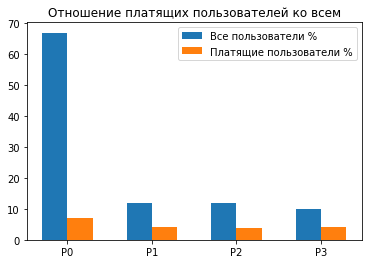

In [26]:
cat_par = [f"P{i}" for i in range(4)]

g1 = profiles_region['percentage_all']
g2 = profiles_region['percentage_payers']

width = 0.3

x = np.arange(len(cat_par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='Все пользователи %')
rects2 = ax.bar(x + width/2, g2, width, label='Платящие пользователи %')
ax.set_title('Отношение платящих пользователей ко всем')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

**Вывод:**

В данных представлены пользовательские профили из 4 регионов, самой большой популярностью приложение пользуется в США, далее примерно на одном уровне идут Англия и Франция, завершает Германия.

Лучше всего конвертируются в платящих пользователи из США, далее идут Германия, Великобритания и Франция.

### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи? 

In [27]:
# пользовательские профили в разбивке по девайсу

profiles_device = profiles.groupby('device').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
profiles_device['percentage_all'] = (profiles_device['user_id'] / profiles_device['user_id'].sum() * 100).round()
profiles_device['payers'] = profiles.query('payer == True').groupby('device').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
profiles_device['percentage_payers'] = (profiles_device['payers'] / profiles_device['user_id'] * 100).round(2)
profiles_device

,user_id,percentage_all,payers,percentage_payers
device,,,,
iPhone,54479,36.0,3382,6.21
Android,35032,23.0,2050,5.85
PC,30455,20.0,1537,5.05
Mac,30042,20.0,1912,6.36


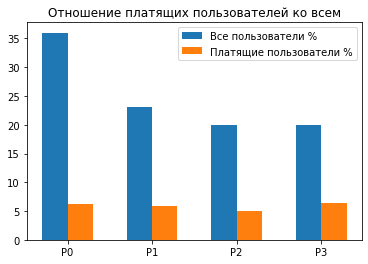

In [28]:
cat_par = [f"P{i}" for i in range(4)]

g1 = profiles_device['percentage_all']
g2 = profiles_device['percentage_payers']

width = 0.3

x = np.arange(len(cat_par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='Все пользователи %')
rects2 = ax.bar(x + width/2, g2, width, label='Платящие пользователи %')
ax.set_title('Отношение платящих пользователей ко всем')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

**Вывод:**

У нас есть данные о 4 используемых устройствах пользователями - `iPhone`, `Android`, `PC`, `Mac`. Наибольшее количество пользователей (36%) используют `iPhone` и `Android` - 23%, можем сделать вывод, что приложение популярнее и чаще используется на мобильных устройствах. Пользователей на `PC` и `Mac` примерно одинаковое количество - по 20%. 

Если смотреть на процент конверсии в платящих пользователей, то все устройства примерно на одном уровне. 

### Через какие источники привлечение пришли пользователи и из каких каналов пришло больше всего платящих пользователей?

In [29]:
# пользовательские профили в разбивке по каналам привлечения

profiles_channel = profiles.groupby('channel').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
profiles_channel['percentage_all'] = (profiles_channel['user_id'] / profiles_device['user_id'].sum() * 100).round()
profiles_channel['payers'] = profiles.query('payer == True').groupby('channel').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
profiles_channel['percentage_payers'] = (profiles_channel['payers'] / profiles_channel['user_id'] * 100).round()
profiles_channel

,user_id,percentage_all,payers,percentage_payers
channel,,,,
organic,56439,38.0,1160,2.0
FaceBoom,29144,19.0,3557,12.0
TipTop,19561,13.0,1878,10.0
OppleCreativeMedia,8605,6.0,233,3.0
LeapBob,8553,6.0,262,3.0
WahooNetBanner,8553,6.0,453,5.0
RocketSuperAds,4448,3.0,352,8.0
MediaTornado,4364,3.0,156,4.0
YRabbit,4312,3.0,165,4.0


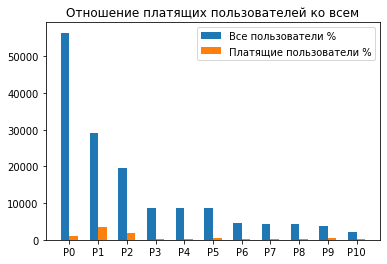

In [30]:
cat_par = [f"P{i}" for i in range(11)]

g1 = profiles_channel['user_id']
g2 = profiles_channel['payers']

width = 0.3

x = np.arange(len(cat_par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='Все пользователи %')
rects2 = ax.bar(x + width/2, g2, width, label='Платящие пользователи %')
ax.set_title('Отношение платящих пользователей ко всем')
ax.set_xticks(x)

ax.set_xticklabels(cat_par)
ax.legend()

**Вывод:**

Всего пользователи привлекались с помощью 10 каналов, а 11 канал отображает органических пользователей. Больше всего пользователей из канала `organic` - 38%, это нормально, чаще всего пользователи попадают самостоятельно в приложение, на втором месте канал `FaceBoom` - 19%, третье место занимет канал `TipTop` - 13%.

В платящих лучше всего конвертируются пользователи `FaceBoom` - 12% от всех пользователей, пришедших из этого канала, далее идет `AdNonSense` - 11%, `TipTop` и `LambdaMediaAds` - 10%. Однако, на основании этих данных мы не можем сделать, насколько качественные пользователи были привлечены с помощью лидирующих каналов привлечения, предстоит посмотреть на их окупаемость и оценить, насколько они выгодны для привлечения. 

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Общая сумма расходов на маркетинг. Распределение трат по рекламным каналам.

In [31]:
cost_total = costs['costs'].sum()
print('Общая сумма трат на маркетинг:', cost_total.round())

Общая сумма трат на маркетинг: 105497.0


In [32]:
# построим таблицу с распредлением трат по рекламным каналам

costs_channels = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
costs_channels['percent'] = (costs_channels['costs'] / cost_total * 100).round()
costs_channels

,costs,percent
channel,,
TipTop,54751.30,52.0
FaceBoom,32445.60,31.0
WahooNetBanner,5151.00,5.0
AdNonSense,3911.25,4.0
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,2.0
LeapBob,1797.60,2.0
lambdaMediaAds,1557.60,1.0
MediaTornado,954.48,1.0


[Text(0.5, 1.0, 'Распределение расходов на маркетинг по каналам'),
 Text(0.5, 0, 'Канал привлечения'),
 Text(0, 0.5, 'Маркетинговые расходы')]

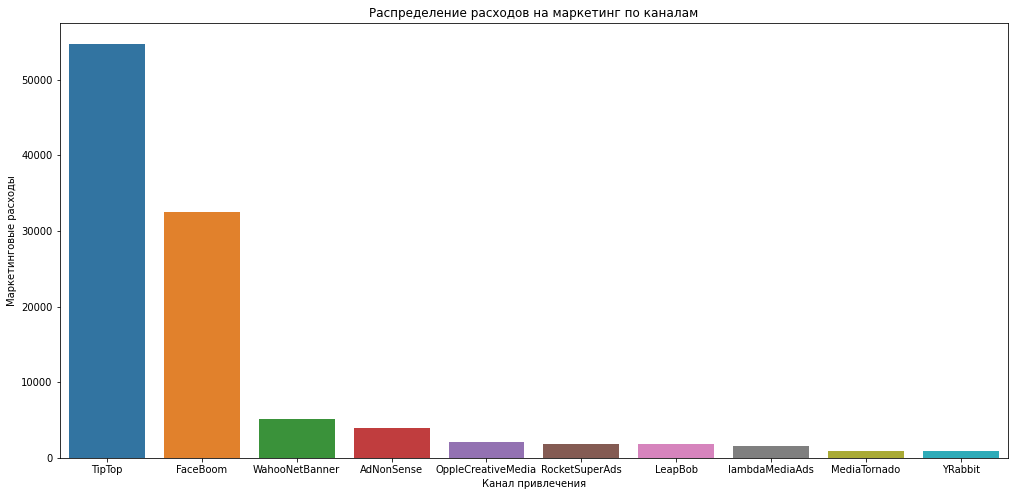

In [33]:
# costs_channels.plot(kind='bar', y='costs')

plt.figure(figsize=(17,8))
(sns.barplot(data = costs_channels, x = costs_channels.index, y = 'costs')
    .set(title='Распределение расходов на маркетинг по каналам', xlabel='Канал привлечения', ylabel='Маркетинговые расходы'))

**Вывод:**

Самые большие маркетинговые вложения пришлись на канал `TipTop` (52%), второй канал по объему вложений - `FaceBoom` (31%). В остальные каналы привлечения вкладывали не так много денег.

### Динамика изменения расходов во времени по каналам

In [34]:
# добавим в таблицу поля с номерами недель и месяцев

costs_dynamics = costs
costs_dynamics['dt'] = pd.to_datetime(costs_dynamics['dt'])
costs_dynamics['week'] = costs_dynamics['dt'].dt.week
costs_dynamics['month'] = costs_dynamics['dt'].dt.month
costs_dynamics.head()

/tmp/ipykernel_31/876238970.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  costs_dynamics['week'] = costs_dynamics['dt'].dt.week


,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


Text(0, 0.5, 'Маркетинговые расходы')

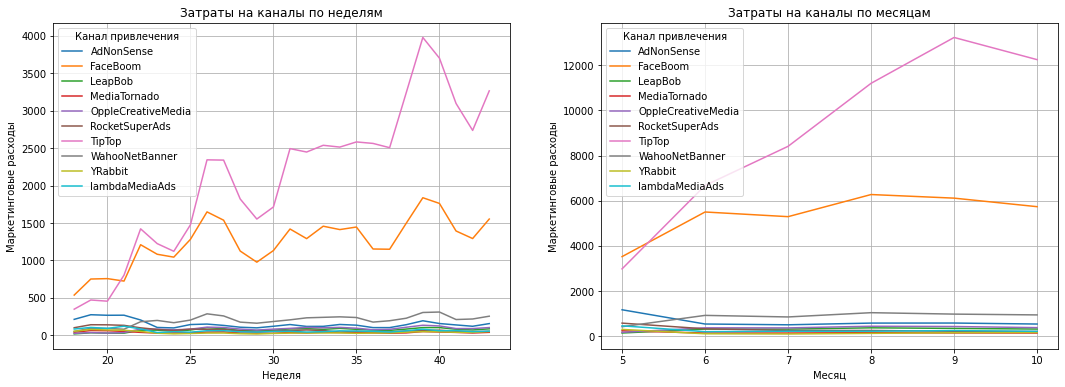

In [35]:
ax1 = plt.subplot(1, 2, 1)
costs_dynamics.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(18, 6), ax=ax1)
plt.legend(title='Канал привлечения')
ax1.set_title('Затраты на каналы по неделям')
plt.xlabel('Неделя')
plt.ylabel('Маркетинговые расходы')
 
ax2 = plt.subplot(1, 2, 2)
costs_dynamics.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(18, 6), ax=ax2)
plt.legend(title='Канал привлечения')
ax2.set_title('Затраты на каналы по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Маркетинговые расходы')

**Вывод:**

Больше всего приходится затрат на канал `TipTop`, со временем затраты только увеличиваются. Схожая ситуация с каналом `FaceBoom`, правда затраты тут стабильнее.

### CAC по каналам привлечения

In [36]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [37]:
cac = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values(by='acquisition_cost', ascending=False)
cac

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Вывод:**

Самые дорогие пользователи в канале `TipTop`, далее идет `FaceBoom` и `AdNonSense`.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Окупаемость рекламы. Графики LTV, ROI. Графики динамики LTV, CAC, ROI

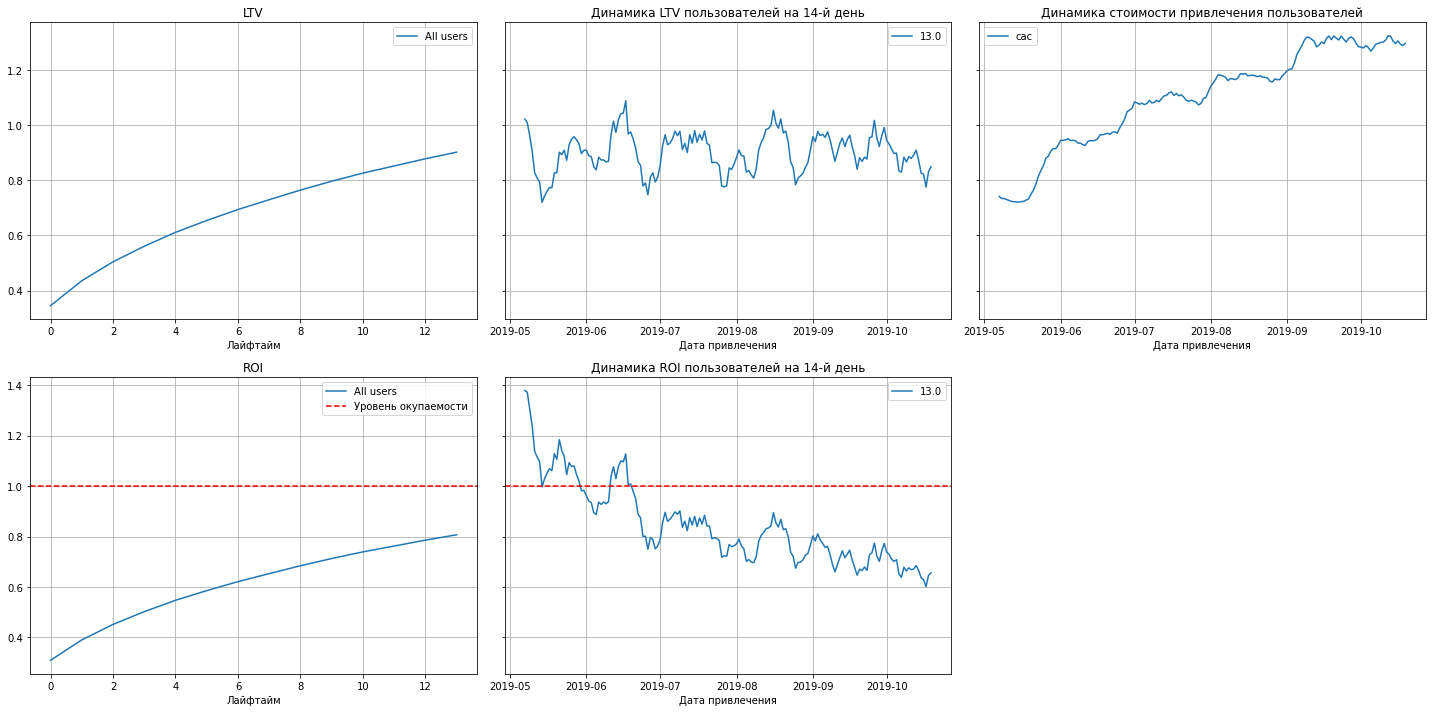

In [38]:
# определяем момент анализа
observation_date = datetime(2019, 11, 1).date()

# определяем горизонт анализа
horizon_days = 14 

# исключаем органических пользователей
profiles_payed = profiles.query('channel != "organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_payed, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**

- Реклама не окупается, ROI в динамике падает. Пользователи, которых привлекали с середины июня, очень дорогие, поэтому реклама не окупается.
- CAC увеличивается, соответственно рекламный бюджет постоянно становится больше. Видим резкий скачок между маем и июнем.
- LTV достаточно стабилен.

### Конверсия и динамика её изменения. Удержание пользователей и динамика его изменений. Графики

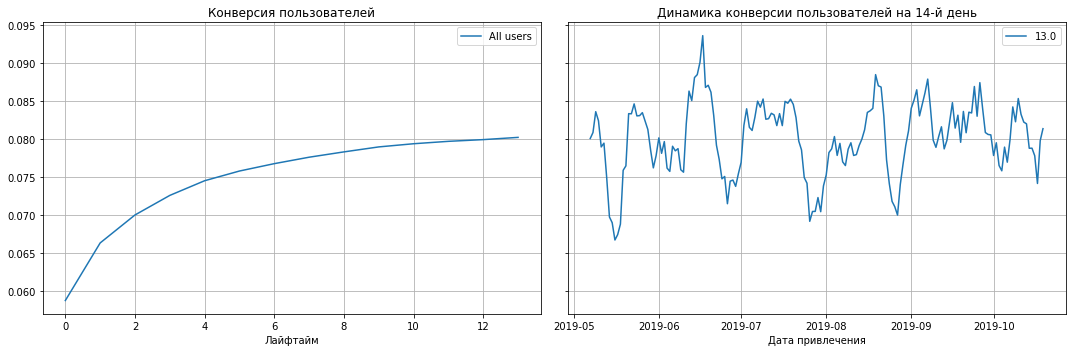

In [39]:
# вызываем функцию для расчета конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_payed, orders, observation_date, horizon_days
)

# строим график конверсии и динамики ее изменения
plot_conversion(conversion, conversion_history, horizon_days, window=7)

Конверсия пользователей постоянно растет. Если посмотреть на график динамики конверсии пользователей на 14-й день, можем увидеть, что в первый месяц есть сильная просадка в конверсии, в середине июня есть пик по конверсии, в целом график достаточно стабилен, просадка в конверсии наблюдается обычно в конце месяца.

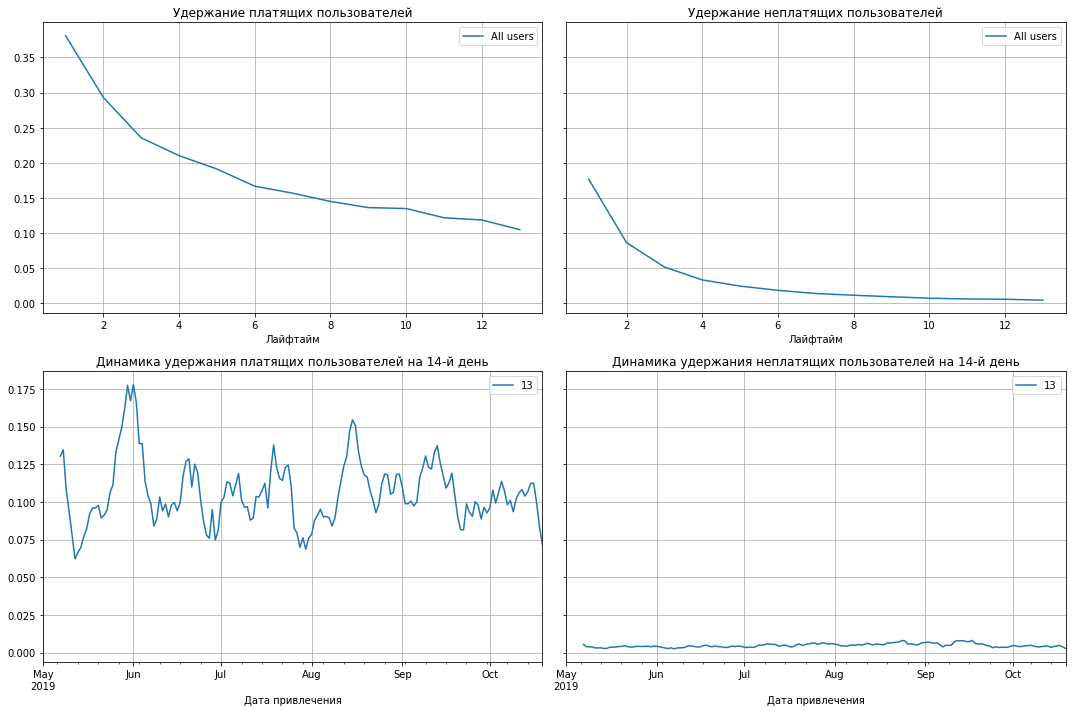

In [40]:
# вызываем функцию для расчета удержания
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_payed, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days, window=7)

Удержание платящих пользователей, что логично, выше, чем неплатящих. В целом динамика удержания стабильна.

### Окупаемость рекламы с разбивкой по устройствам. Графики LTV и ROI. Графики динамики LTV, CAC и ROI.

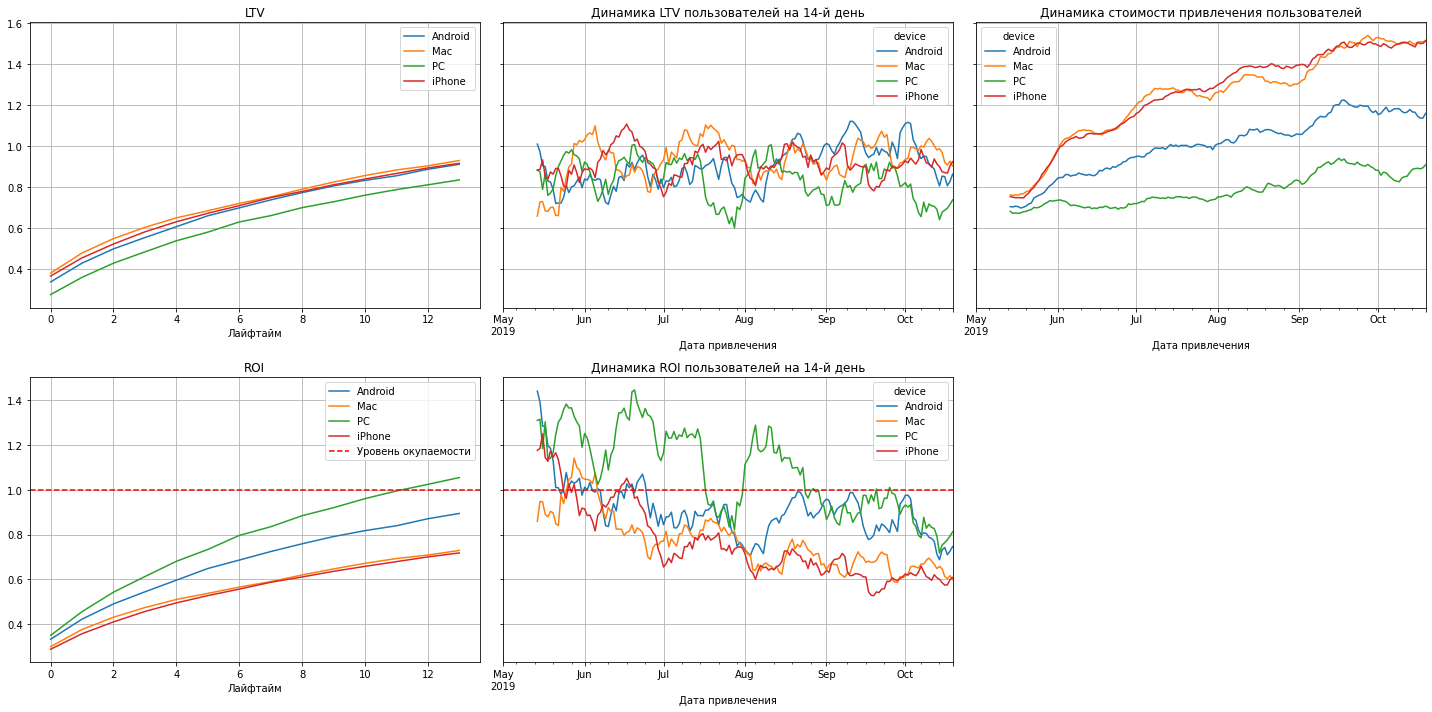

In [41]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payed, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**

- Пользователи PC стабильно окупаются, тогда как пользователи Android не окупаются, а Mac и iPhone сильно не окупаются, в динамике они перестали окупаться к середине июня - началу июля.
- Самые дорогие по привлечению пользователи с устройствами iPhone и Mac.

### Окупаемость рекламы с разбивкой по странам. Графики LTV и ROI. Графики динамики LTV, CAC и ROI.

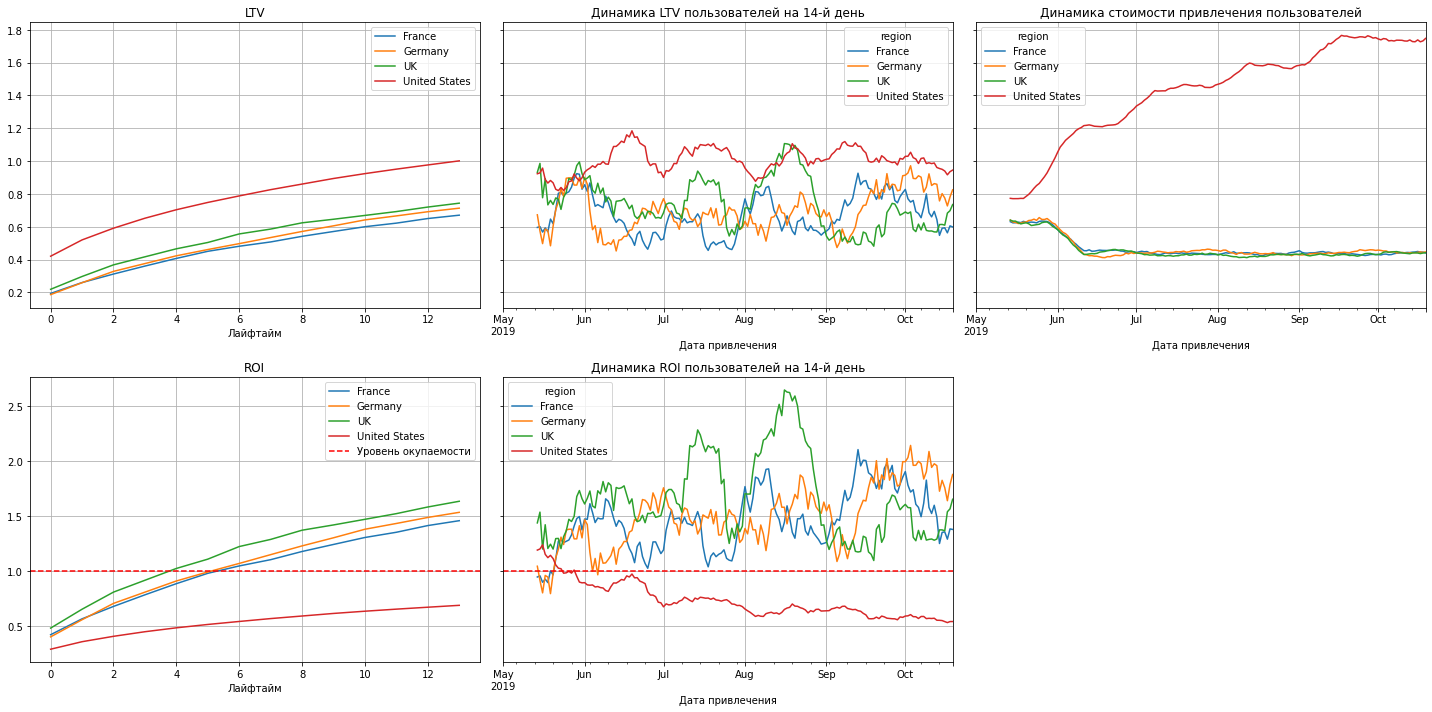

In [42]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payed, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**

- Самый высокий LTV у пользователей из США, их стоимость привлечения в несколько раз выше, чем в других странах. Эти пользователи не окупаются. Если посмотреть на график динамики ROI пользователей на 14-ый день, можем сделать вывод, что пользователи из США окупались до середины мая, как раз в тот момент, когда выросла стоимость их привлечения.
- Пользователи из других стран - Франции, Великобритании и Германии окупаются, стоимость привлечения одного пользователей из этих стран примерно на одном уровне и стабильна. 

### Окупаемость рекламы с разбивкой по каналам привлечения. Графики LTV и ROI. Графики динамики LTV, CAC и ROI.

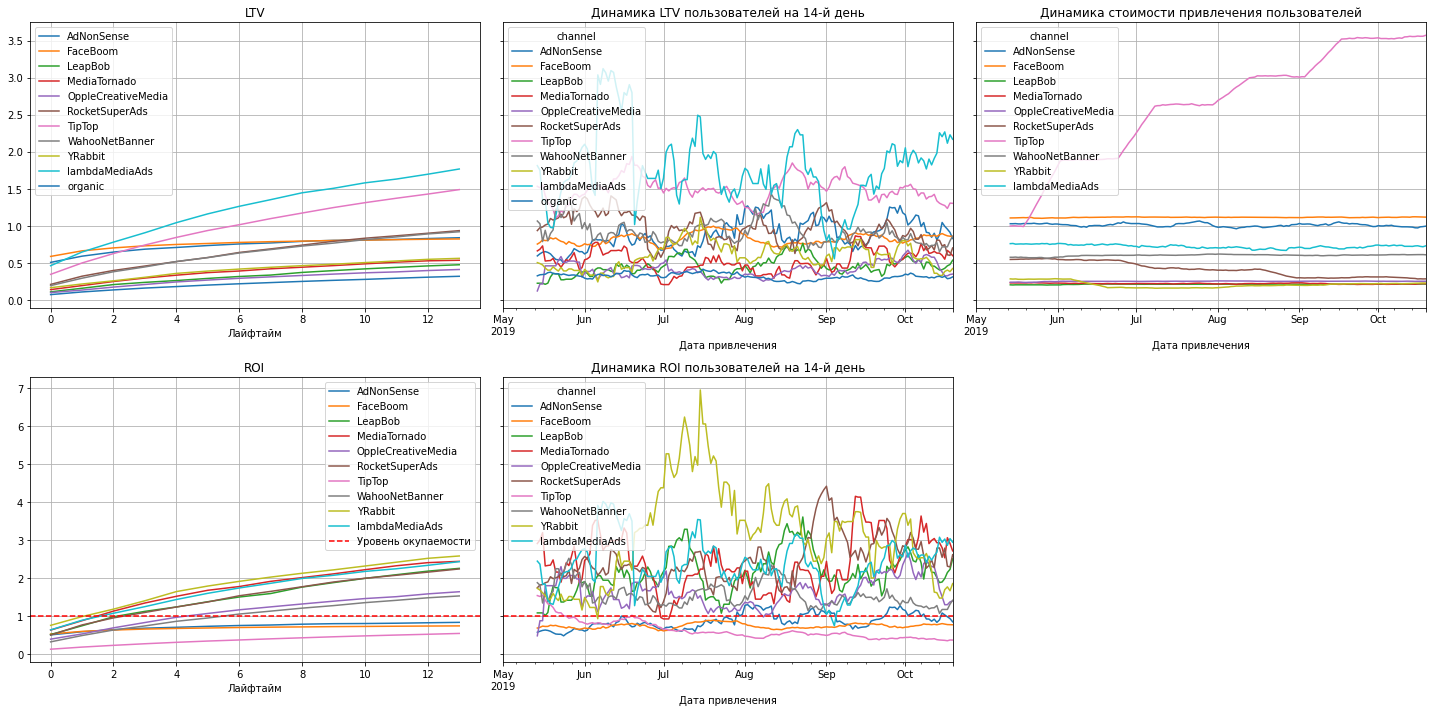

In [43]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**

- Большая часть каналов стабильно окупаются, лучший по окупаемости - `YRabbit`. Не окупаются каналы `AdNonSence`, `FaceBoom` и `TipTop`.
- В динамике стоимость пользователей, привлеченных через `TipTop` кратно увеличивается, что в том числе влечет за собой общую неокупаемость рекламных кампаний.

## Выводы

- Выделить причины неэффективности привлечения пользователей.
- Сформулировать рекомендации для отдела маркетинга.

**Причины неэффективности привлечения пользователей**
- Высокий CAC пользователей из США, в следствие чего привлечение таких пользователей не окупается. 
- Высокий CAC пользователей, привлеченных через `TipTop`.
- Не окупаются пользователи `Mac` и `iPhone`.

**Рекомендации для отдела маркетинга**
- Пользователи США занимают первое место по использованию приложения, но стоимость их привлечения слишком большая. Возможно стоит привлекать больше пользователей из других регионов либо изменить каналы привлечения для этих пользователей. 

- Стоит поменять распределение бюджетов между каналами привлечения пользователей. Сделать упор на каналах, которые стабильно окупаются, например, `YRabbit`, `MediaTornado`, `LambdaMediaArts`, сократить инвестиции или полностью перестаь вкладываться к такие каналы как `AdNonSence`, `FaceBoom` и `TipTop`. В эти каналы вкладывается основная масса бюджетов, тем не менее затраты на привлечение намного выше прибыли с таких пользователей.

- Пользователи `Mac` и `iPhone` не окупаются. Нужно делать упор на привлечении пользователей `iPhone`, но снижать стоимость привлечения одного пользователя. 